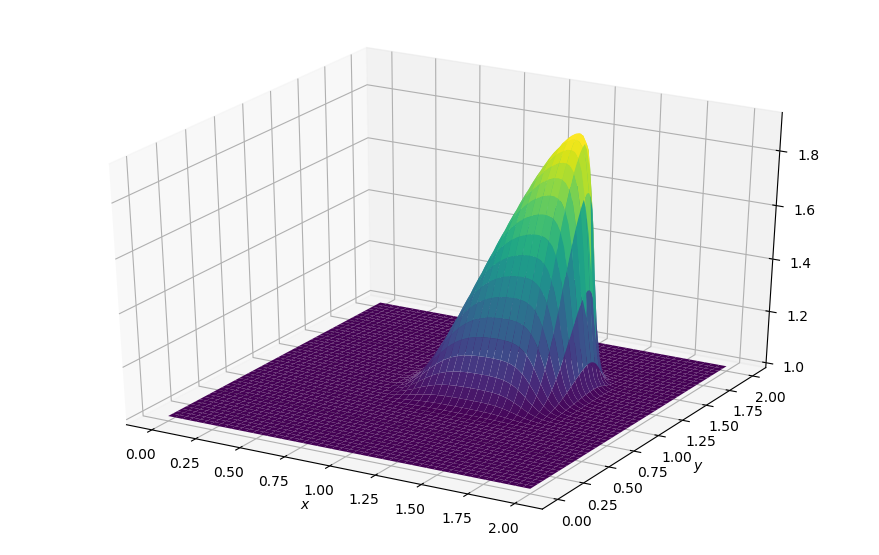

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

# Define domain
lx = 2
ly = 2

# Setup simulation
nx = 101
ny = 101
nt = 200
sigma = 0.1

dx = lx/nx
dy = ly/ny
dt = sigma * dx

x = np.linspace(0, lx, nx)
y = np.linspace(0, ly, ny)

u = np.ones((ny, nx))
v = np.ones((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))

# Define initial & boundary conditions
u[int(0.5 / dy):int(1 / dy), int(0.5 / dx):int(1 / dx)] = 2
v[int(0.5 / dy):int(1 / dy), int(0.5 / dx):int(1 / dx)] = 2

for n in range(nt):
    un = u.copy()
    vn = v.copy()
    u[1:, 1:] = un[1:, 1:] - u[1:, 1:] * dt / dx * (u[1:, 1:] - u[1:, :-1]) - v[1:, 1:] * dt / dy * (u[1:, 1:] - u[:-1, 1:])
    v[1:, 1:] = vn[1:, 1:] - u[1:, 1:] * dt / dx * (v[1:, 1:] - v[1:, :-1]) - v[1:, 1:] * dt / dy * (v[1:, 1:] - v[:-1, 1:])
    
    # Maintain boundary conditions
    u[0, :] = 1
    u[:, 0] = 1
    u[-1, :] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[:, 0] = 1
    v[-1, :] = 1
    v[:, -1] = 1

# Plot
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');